<a href="https://colab.research.google.com/github/yngdln/math-statistics/blob/main/%D0%9B%D0%B0%D0%B15%2B6_%D0%9C%D0%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
X = np.array([-15.754,-5.357,-5.177,-7.58,-0.929,-13.199,-8.135,0.323,-8.631,-1.297,
              -10.437,-3.874,-8.748,-8.036,-7.85,-11.149,-12.184,-7.747,-3.767,1.761,
              -11.87,0.823,-1.097,-8.208,-12.289,-8.661,-2.067,-7.831,-4.29,-7.062,
              -3.571,-12.35,-10.295,-8.066,-1.334,-2.598,-7.224,-5.336,-7.22,-7.747,
              -6.725,-4.637,-5.206,-8.816,-11.586,-14.533,-10.135,-9.516,-5.503,-9.966,
              -8.782,-10.151,-5.609,-5.025,-8.187,-7.44,-5.41,-9.567,-6.365,-9.776,
              -12.632,-6.32,-7.54,-1.798,-9.049,-10.221,-2.571,-10.856,-5.774,-7.42,
              -11.878,-2.76,-0.8,-7.944,-6.091,0.113,-3.328,-10.045,-7.386,-4.706,
              -10.041,-9.209,-4.214,-9.859,-4.108,-3.329,2.647,-8.015,-8.397,-7.12,
              -4.833,-5.303,-14.177,-4.619,-15.765,-8.972,-0.772,-17.609,-3.698,-1.299,
              -1.904,-6.024,-7.803,-5.757,-0.452,-7.508,-3.84,-7.814,-5.63,-5.21,
              -2.536,-7.717,-5.87,-4.508,-3.493,-10.479,-9.096,-1.598,-8.127,-6.348])

In [ ]:
n = len(X)
n

120

In [ ]:
sum((X))

-808.4069999999998

#### 1) Критерий S2 уровня alpha и проверить гипотезу a = a0 против H2: a > a0, если sigm неизвестно

In [ ]:
alpha = 0.1
a0 = -6.8

In [ ]:
mean_v = np.mean(X)
mean_v

-6.736725000000001

In [ ]:
std_v = np.std(X, ddof=1)
std_v

3.8671079415116565

In [ ]:
np.sqrt((1/(n-1)) * (np.sum((X - np.mean(X))**2)))

3.8671079415116565

In [ ]:
(mean_v - a0) / std_v * np.sqrt(n)

0.1792406384839176

In [ ]:
from scipy import stats

In [ ]:
t_1 = stats.t(df=n-1).ppf(0.9)
t_1

1.2887061912187294

In [ ]:
t_1 * std_v / np.sqrt(n) + a0

-6.34506475239609

#### 2) Критерий S3 уровня alpha и гипотеза sigm = sigm0 при неизвестном a против альтернативы sigm > sigm0

In [ ]:
sigm0 = 3.2

In [ ]:
x_1 = 139.149464377303 # квантиль хи квадрат

In [ ]:
(n-1)*std_v**2 / sigm0**2

173.78792343017577

#### 3) Критерий оптимальный критерий S1 уровня альфа и проверить H0 против простой альтернативы H1: a=a1, если sigma известна

In [ ]:
sum(X)/n

-6.736724999999998

In [ ]:
import math
from scipy.stats import norm

In [ ]:
l = math.trunc(1 + np.log2(n))

In [ ]:
x = np.linspace(min(X), max(X), 1000)
y1 = norm.pdf(x, -6.8, 3.4)
y2 = norm.pdf(x, -6.2, 3.4)

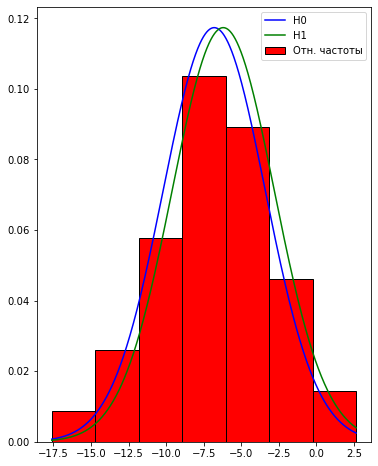

In [ ]:
plt.figure(figsize=(6,8))
plt.hist(X, bins=l, edgecolor='black', density=True, color='red')
plt.plot(x, y1, color='blue')
plt.plot(x, y2, color='green')
plt.legend(['H0', 'H1', 'Отн. частоты'])
plt.show()

## Критерий Вальда

In [ ]:
((1-0.26)*np.log(7.4) + 0.26*np.log(13/45)) / 0.01557

74.38983851992346

In [ ]:
alpha = 0.1
beta = 0.26
A = (1-beta)/alpha
B = beta/(1-alpha)

In [ ]:
a0 = -6.8
a1 = -6.2
sigma1 = 3.4

In [ ]:
def f(X, n, a0, a1, sigma1):
    z = 1
    for i in range(n):
        z *= np.exp( X[i] * (a1 - a0) / (sigma1**2) + (a0**2 - a1**2)/(2 * sigma1**2))
    return z

In [ ]:
Z = []
for i in range(n):
    Z.append(f(X, i, a0, a1, sigma1))

In [ ]:
x = np.arange(1, 121)

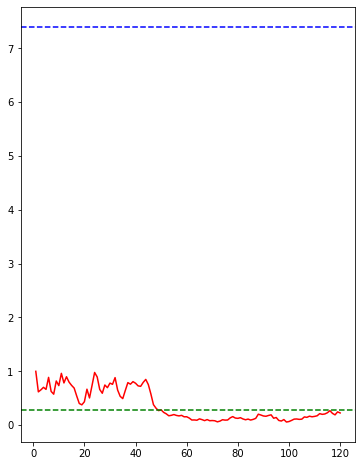

In [ ]:
plt.figure(figsize=(6,8))
plt.plot(x, Z,color = "r")
plt.axhline(y=B,color="g",linestyle = "--",label='B')
plt.axhline(y=A,color="b",linestyle = "--",label='A')
plt.show()